In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
zola='Zola-Emile'
dumas='Dumas-Alexandre'
dumas_pere='Dumas-Alexandre-Pere'

In [5]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling/doc-topics-dumas.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname=docname.replace(zola,'').replace(dumas_pere,'').replace(dumas,'')
        mallet_docnames.append(docname[6:-4])
        print(docname[6:-4])
        for topic, share in grouper(2, values):
            triple = (docname[6:-4], int(topic), float(share))
            doctopic_triples.append(triple)

home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1845__Vingt-ans-apres
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1850__La-Tulipe-noire
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1850__La-femme-au-collier-de-velours
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1871__La-fille-du-marquis-II
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1871__Le-docteur-mysterieux-II
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1867__Les-Blancs-et-les-Bleus
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1858__sultanetta
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1858__Jane
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1852__La-comtesse-de-Charny
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1845__Le-Comte-de-Monte-Cristo
home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1858__Black
home/odysseus/Bureau/ANR/code/topic_mo

In [6]:
print(doctopic_triples)

[('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 5, 0.21588368600265218), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 8, 0.15408853101795766), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 11, 0.14509632324560232), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 3, 0.10510717656905044), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 1, 0.09984484333380467), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 17, 0.09826270392974384), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 18, 0.08842210256390659), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 12, 0.08583106267029973), ('home/odysseus/Bureau/ANR/code/topic_modelling/txt/dumas/1864__La-San-Felice', 6, 0.004071907089436735), ('home/odysseus/Bureau/ANR/code/topic_modelling/t

In [7]:
mallet_docnames = sorted(mallet_docnames)

In [8]:
num_docs = len(mallet_docnames)

In [9]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [10]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

360
20


In [11]:
doctopic = np.zeros((num_docs, num_topics))

In [12]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [13]:
novel_names = []

In [14]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

18


In [15]:
novel_names = np.asarray(novel_names)

In [16]:
doctopic

array([[  2.39085478e-01,   1.42807904e-01,   8.49184783e-05,
          1.27013067e-01,   4.04611573e-04,   3.49664322e-05,
          3.38175352e-03,   2.14793798e-04,   1.51999081e-01,
          2.14793798e-04,   2.04803389e-04,   5.16154492e-02,
          9.51586477e-03,   9.49088875e-05,   1.54851343e-04,
          4.49568414e-05,   1.74832161e-04,   1.07012268e-01,
          1.65596028e-01,   3.44669118e-04],
       [  2.07873613e-04,   1.22053791e-01,   1.43912501e-04,
          1.61368555e-01,   2.84898782e-01,   1.65232872e-04,
          1.38049399e-03,   2.18533798e-04,   1.39120748e-01,
          3.03815280e-04,   6.92912043e-05,   3.76038036e-02,
          4.79175328e-03,   9.06115748e-05,   1.01271760e-04,
          1.33252316e-04,   1.33252316e-04,   9.92303346e-02,
          1.47883420e-01,   1.01271760e-04],
       [  2.05293844e-05,   1.60355021e-01,   4.90424183e-04,
          1.27594686e-01,   1.48267776e-04,   2.03012801e-04,
          9.40017701e-03,   1.34581520e-04

In [17]:
doctopic_orig = doctopic.copy()

In [18]:
num_groups = len(set(novel_names))
print(num_groups)

18


In [19]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [20]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [21]:
doctopic = doctopic_grouped

In [22]:
doctopic

array([[  2.39085478e-01,   1.42807904e-01,   8.49184783e-05,
          1.27013067e-01,   4.04611573e-04,   3.49664322e-05,
          3.38175352e-03,   2.14793798e-04,   1.51999081e-01,
          2.14793798e-04,   2.04803389e-04,   5.16154492e-02,
          9.51586477e-03,   9.49088875e-05,   1.54851343e-04,
          4.49568414e-05,   1.74832161e-04,   1.07012268e-01,
          1.65596028e-01,   3.44669118e-04],
       [  2.07873613e-04,   1.22053791e-01,   1.43912501e-04,
          1.61368555e-01,   2.84898782e-01,   1.65232872e-04,
          1.38049399e-03,   2.18533798e-04,   1.39120748e-01,
          3.03815280e-04,   6.92912043e-05,   3.76038036e-02,
          4.79175328e-03,   9.06115748e-05,   1.01271760e-04,
          1.33252316e-04,   1.33252316e-04,   9.92303346e-02,
          1.47883420e-01,   1.01271760e-04],
       [  2.05293844e-05,   1.60355021e-01,   4.90424183e-04,
          1.27594686e-01,   1.48267776e-04,   2.03012801e-04,
          9.40017701e-03,   1.34581520e-04

In [23]:
N, K = doctopic.shape
print(K)

20


In [24]:
ind = np.arange(N)

In [25]:
width = 0.5

In [26]:
plt.rcParams["figure.figsize"] = [16,9]

In [27]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 18 artists>

In [28]:
plt.xticks(ind + width/2, range(1,len(novel_names)))

([<matplotlib.axis.XTick at 0x7fb164c11470>,
 <a list of 17 Text xticklabel objects>)

In [29]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

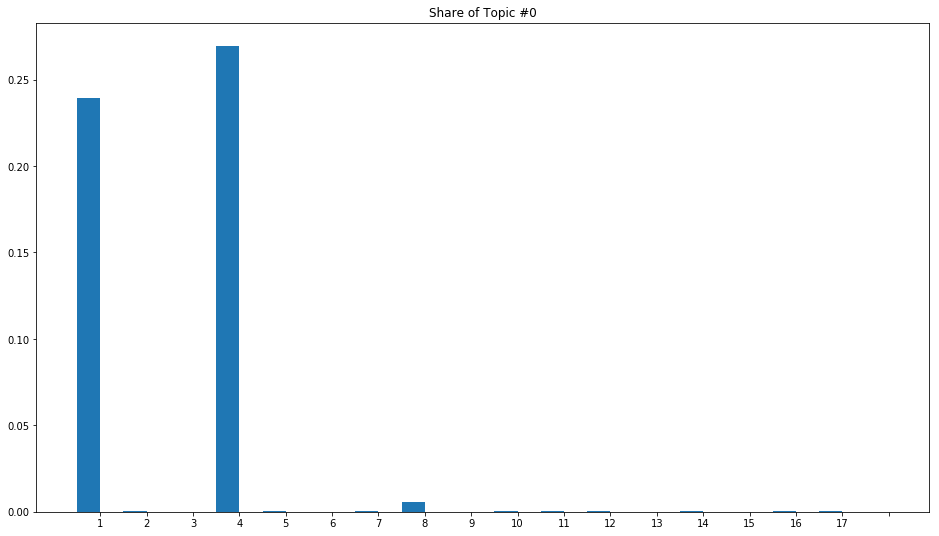

In [30]:
plt.show()

In [31]:
plots = []

In [32]:
height_cumulative = np.zeros(N)

In [33]:
for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [34]:
plt.ylim((0, 1))

(0, 1)

In [35]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [36]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [37]:
plt.xticks(ind+width/2, range(1,len(novel_names)))
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
1844__Les-Trois-Mousquetaires
numero 2
1845__La-Reine-Margot
numero 3
1845__Le-Comte-de-Monte-Cristo
numero 4
1845__Vingt-ans-apres
numero 5
1848__La-dame-aux-camelias
numero 6
1850__La-Tulipe-noire
numero 7
1850__La-femme-au-collier-de-velours
numero 8
1850__Le-Vicomte-de-Bragelonne
numero 9
1852__La-comtesse-de-Charny
numero 10
1854__Le-page-du-duc-de-Savoie-I
numero 11
1858__Black
numero 12
1858__Jane
numero 13
1858__sultanetta
numero 14
1859__Les-Louves-de-Machecoul
numero 15
1864__La-San-Felice
numero 16
1867__Les-Blancs-et-les-Bleus
numero 17
1871__La-fille-du-marquis-II
numero 18
1871__Le-docteur-mysterieux-II


In [38]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7fb16266b588>],
 <a list of 1 Text yticklabel objects>)

In [39]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = ['Topic #{}'.format(k) for k in range(K)]

In [40]:
plt.legend([p[0] for p in plots], topic_labels)

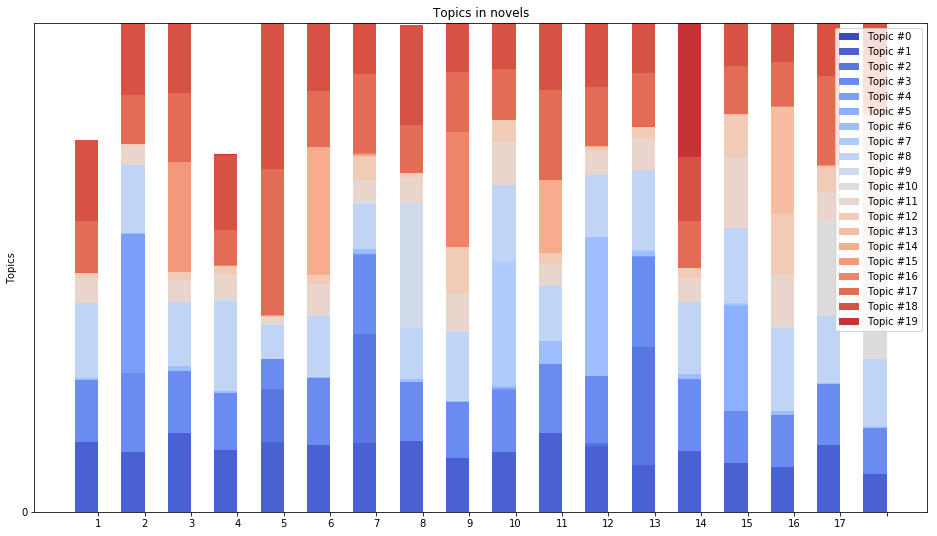

In [41]:
plt.show()